# Ultimate Pig
This notebook analyzes the game of pig solitaire, a single-player dice game.

### Game Rules
* A player has 7 turns in which to score the most number of points possible
* The player must roll at least once, but may roll as many times as they wish during a turn
* If the player rolls a 1, all points are lost and the turn is over
* Each turn's score is the sum of their rolls (except if they roll a 1, in which case that turn is worth 0 points)
* The player may choose to hold their current turn score at any time after a non-1 roll

## Objective
Find the best strategy for this game, the "ultimate pig" player.

In [1]:
import math
import random
import matplotlib.pyplot as plt
import statistics as st

In [2]:
%matplotlib inline

## Code

In [3]:
class PigGame:
    """
    Responsibilities:
    - Keep track of who is playing
    - Keep track of how many turns have occurred
    - End game if turn limit has been exceeded
    - Record player score
    - Report statistics on game
    - Iterate
    
    Collaborators:
    - Player
    """
    
    def __init__(self, player):
        self.player = player
        self.turn_limit = 7
        self.reset()
        
    def reset(self):
        self.turns = 0
        self.score = 0
        self.turn_scores = []
        
    def iterate(self):
        self.turn_scores.append(self.player.get_move())
        # .get_move() will need to return the score
        self.score += self.turn_scores[-1]
        self.turns += 1
    
    def run_pig_sim(self):
        self.reset()
        while self.turns < self.turn_limit:
            self.iterate()
        return self.score       
        

In [4]:
class Player:
    """
    Responsibilities:
    - Keep track of score during turn
    - Roll dice
    """
    def __init__(self):
        self.turn_score = []

    def roll_dice(self):
        '''Returns random dice roll value'''
        self.turn_score.append(random.randint(1, 6))
            

In [5]:
class VariRoller(Player):
    
    def __init__(self, num_rolls=5):
        super().__init__()
        self.num_rolls = num_rolls
    
    def get_move(self):
        self.turn_score = []
        [self.roll_dice() for _ in range(self.num_rolls)]
        if 1 in self.turn_score:
            return 0
        else:
            return sum(self.turn_score)

In [6]:
class VariHold(Player):
    
    def __init__(self, hold_num=22):
        super().__init__()
        self.hold_num = hold_num
    
    def get_move(self):
        self.turn_score = []
        while sum(self.turn_score) < self.hold_num:
            self.roll_dice()
        if 1 in self.turn_score:
            return 0
        else:
            return sum(self.turn_score)

In [7]:
def pig_trials(player, num_trials=10000):
    """
    Run num_trials with specified player type
    - Returns score, number of 0 score turns for each trial
    """
    random.seed(3)  # ensures that "luck" is the same for each 
    trial_stats = []
    for idx in range(num_trials):
        game = PigGame(player)
        game_data = game.run_pig_sim()
        trial_stats.append(game)
    return trial_stats

## Let's Roll!

In [8]:
angie = VariRoller(1)
angie_data = pig_trials(angie, 1000000)

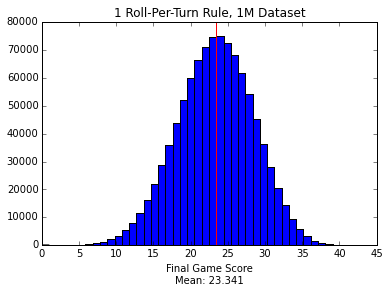

In [9]:
angie_list = [game_data.score for game_data in angie_data]
plt.hist(angie_list, bins = 43)
ymin, ymax = plt.ylim()
plt.vlines(st.mean(angie_list), ymin, ymax , color='red')
plt.xlabel('Final Game Score\nMean: {:.3f}'.format(st.mean(angie_list)))
plt.title('1 Roll-Per-Turn Rule, 1M Dataset')
plt.show()

In [10]:
bernice = VariRoller(2)
bernice_data = pig_trials(bernice, 1000000)

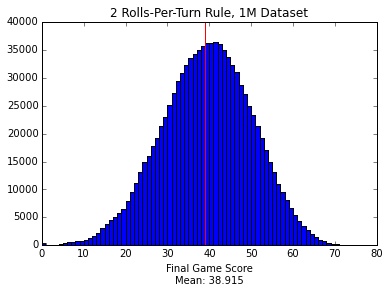

In [11]:
bernice_list = [game_data.score for game_data in bernice_data]
plt.hist(bernice_list, bins = 77)
ymin, ymax = plt.ylim()
plt.vlines(st.mean(bernice_list), ymin, ymax , color='red')
plt.xlabel('Final Game Score\nMean: {:.3f}'.format(st.mean(bernice_list)))
plt.title('2 Rolls-Per-Turn Rule, 1M Dataset')
plt.show()

In [12]:
cheryl = VariRoller(3)
cheryl_data = pig_trials(cheryl, 1000000)

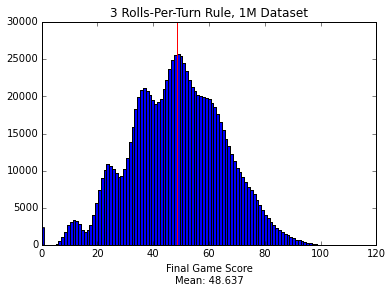

In [13]:
cheryl_list = [game_data.score for game_data in cheryl_data]
plt.hist(cheryl_list, bins = 110)
ymin, ymax = plt.ylim()
plt.vlines(st.mean(cheryl_list), ymin, ymax , color='red')
plt.xlabel('Final Game Score\nMean: {:.3f}'.format(st.mean(cheryl_list)))
plt.title('3 Rolls-Per-Turn Rule, 1M Dataset')
plt.show()

In [14]:
dana = VariRoller(4)
dana_data = pig_trials(dana, 1000000)

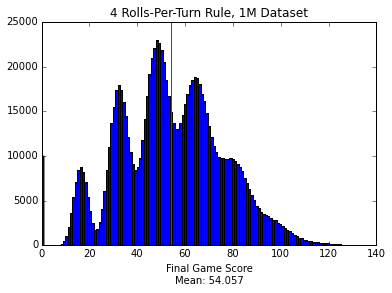

In [15]:
dana_list = [game_data.score for game_data in dana_data]
plt.hist(dana_list, bins = 138)
ymin, ymax = plt.ylim()
plt.vlines(st.mean(dana_list), ymin, ymax , color='red')
plt.xlabel('Final Game Score\nMean: {:.3f}'.format(st.mean(dana_list)))
plt.title('4 Rolls-Per-Turn Rule, 1M Dataset')
plt.show()

In [16]:
elise = VariRoller(5)
elise_data = pig_trials(elise, 1000000)

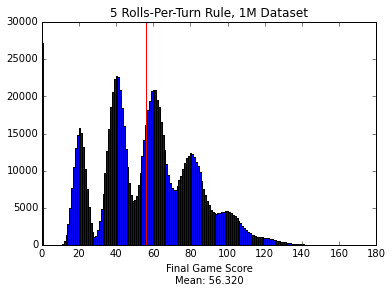

In [17]:
elise_list = [game_data.score for game_data in elise_data]
plt.hist(elise_list, bins = 168)
ymin, ymax = plt.ylim()
plt.vlines(st.mean(elise_list), ymin, ymax , color='red')
plt.xlabel('Final Game Score\nMean: {:.3f}'.format(st.mean(elise_list)))
plt.title('5 Rolls-Per-Turn Rule, 1M Dataset')
plt.show()

In [18]:
fay = VariRoller(6)
fay_data = pig_trials(fay, 1000000)

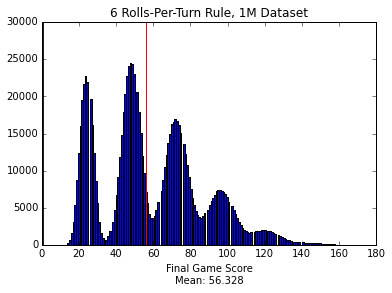

In [19]:
fay_list = [game_data.score for game_data in fay_data]
plt.hist(fay_list, bins = 205)
ymin, ymax = plt.ylim()
plt.ylim(ymin, ymax/2)
plt.xlim(0, 180)
plt.vlines(st.mean(fay_list), ymin, ymax , color='red')
plt.xlabel('Final Game Score\nMean: {:.3f}'.format(st.mean(fay_list)))
plt.title('6 Rolls-Per-Turn Rule, 1M Dataset')
plt.show()

In [20]:
gail = VariRoller(7)
gail_data = pig_trials(gail, 1000000)

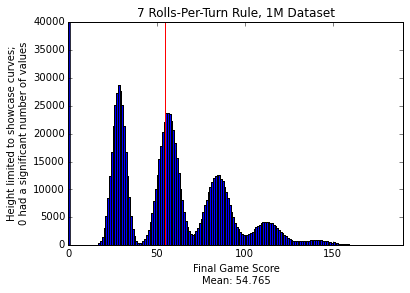

In [21]:
gail_list = [game_data.score for game_data in gail_data]
plt.hist(gail_list, bins = 222)
ymin, ymax = plt.ylim()
plt.ylim(ymin, ymax/3)
plt.xlim(0, 190)
plt.vlines(st.mean(gail_list), ymin, ymax , color='red')
plt.xlabel('Final Game Score\nMean: {:.3f}'.format(st.mean(gail_list)))
plt.title('7 Rolls-Per-Turn Rule, 1M Dataset')
plt.ylabel('Height limited to showcase curves;\n0 had a significant number of values')
plt.show()

In [22]:
hold_vari_roll_data = [pig_trials(VariRoller(n), 100000) for n in range(1,10)]

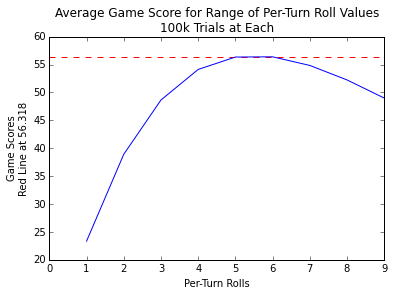

In [23]:
hold_num_vr_data_avgs = []
for n in range(9):
    temp = []
    for m in range(100000):
        temp.append(hold_vari_roll_data[n][m].score)
    hold_num_vr_data_avgs.append(st.mean(temp))
    
plt.plot(range(1,10), hold_num_vr_data_avgs)
plt.title('Average Game Score for Range of Per-Turn Roll Values\n100k Trials at Each')
plt.xlabel('Per-Turn Rolls')
plt.ylabel('Game Scores\nRed Line at 56.318')
plt.hlines(56.318, 0, 9, color='red', linestyle='dashed')
plt.show()

In [24]:
hold_num_data = [pig_trials(VariHold(n),100000) for n in range(1,36)]

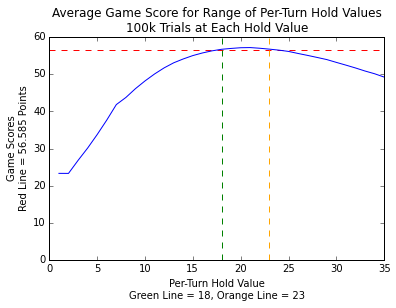

In [25]:
hold_num_data_avgs = []
for n in range(35):
    temp = []
    for m in range(100000):
        temp.append(hold_num_data[n][m].score)
    hold_num_data_avgs.append(st.mean(temp))
    
plt.plot(range(1,36), hold_num_data_avgs)
plt.title('Average Game Score for Range of Per-Turn Hold Values\n100k Trials at Each Hold Value')
plt.xlabel('Per-Turn Hold Value\nGreen Line = 18, Orange Line = 23')
plt.ylabel('Game Scores\nRed Line = 56.585 Points')
plt.hlines(56.585, 0, 35, color='red', linestyle='dashed')
plt.vlines(18, 0, 60, color='green', linestyle='dashed')
plt.vlines(23, 0, 60, color='orange', linestyle='dashed')
plt.show()

From the above, we can see that the ideal range starts at 18 and extends to 23. If we roll an 18, this means that a roll of 6 could put us over 23. The maximum score of 57.077 occurs at 20.

In [26]:
def graph_hold_results(pig_data, hold_num, bins_num=150):
    pig_list = [game_data.score for game_data in pig_data]
    plt.hist(pig_list, bins = bins_num)
    ymin, ymax = plt.ylim()
    plt.ylim(ymin, ymax)
    plt.xlim(0, 190)
    plt.vlines(st.mean(pig_list), ymin, ymax , color='red')
    plt.xlabel('Mean: {:.3f}'.format(st.mean(pig_list)))
    plt.title('Fixed Minimum {}-Points-Per-Turn Hold Rule, 1M Dataset'.format(hold_num))
    plt.show()

In [27]:
hold15_data = pig_trials(VariHold(15), 1000000)
hold15_list = [game_data.score for game_data in hold15_data]

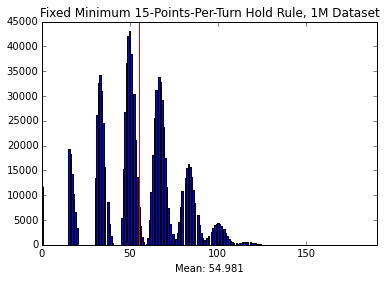

In [28]:
graph_hold_results(hold15_data, 15)

In [29]:
hold16_data = pig_trials(VariHold(16), 1000000)
hold16_list = [game_data.score for game_data in hold16_data]

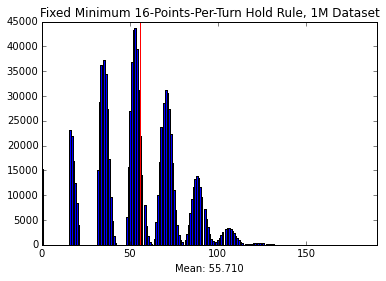

In [30]:
graph_hold_results(hold16_data, 16)

In [31]:
hold17_data = pig_trials(VariHold(17), 1000000)
hold17_list = [game_data.score for game_data in hold17_data]

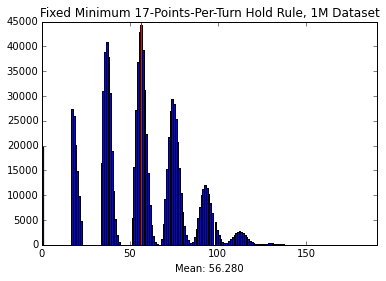

In [32]:
graph_hold_results(hold17_data, 17)

In [33]:
hold18_data = pig_trials(VariHold(18), 1000000)
hold18_list = [game_data.score for game_data in hold18_data]

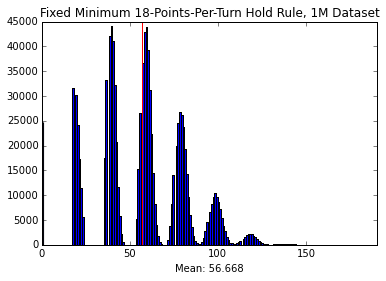

In [53]:
graph_hold_results(hold18_data, 18, 160)

In [35]:
hold19_data = pig_trials(VariHold(19), 1000000)
hold19_list = [game_data.score for game_data in hold19_data]

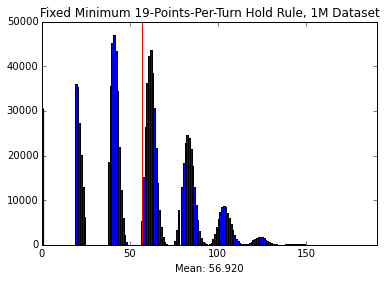

In [54]:
graph_hold_results(hold19_data, 19, 160)

In [37]:
hold20_data = pig_trials(VariHold(20), 1000000)
hold20_list = [game_data.score for game_data in hold20_data]

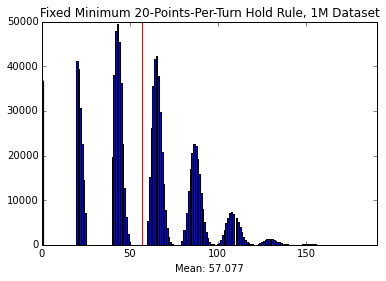

In [60]:
graph_hold_results(hold20_data, 20, 170)

In [39]:
hold21_data = pig_trials(VariHold(21), 1000000)
hold21_list = [game_data.score for game_data in hold21_data]

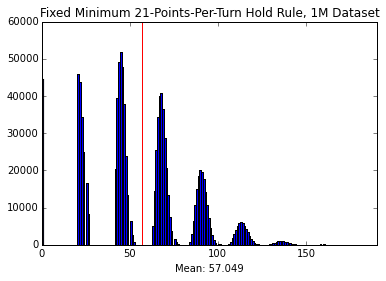

In [59]:
graph_hold_results(hold21_data, 21, 182)

In [41]:
hold22_data = pig_trials(VariHold(22), 1000000)
hold22_list = [game_data.score for game_data in hold22_data]

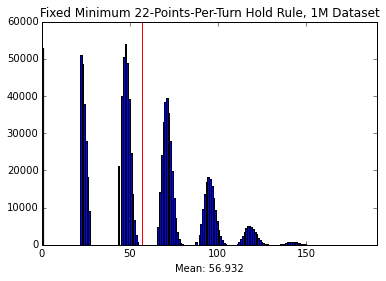

In [62]:
graph_hold_results(hold22_data, 22, 182)

In [43]:
hold23_data = pig_trials(VariHold(23), 1000000)
hold23_list = [game_data.score for game_data in hold23_data]

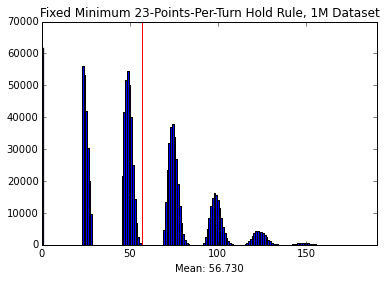

In [64]:
graph_hold_results(hold23_data, 23, 188)

### Shape Analysis (applies to all)
Because there are 7 rounds, there are 7 opportunities to score points. If you "bust" on all turns, you get a 0 point game total. If you "bust" on all but 1, you'll get just the handful of points from that single set of rolls. As this progression of fewer and fewer "bust" turns per game continues, you end up with the highest possible scores. This is why the plots show the "fingers"—they represent the additive distributions of (n dice * 6) width. Thus, for small numbers of dice, the probability of getting points is higher and the overlap of these "fingers" is at its greatest. As the number of per-turn dice rolls increases, the overlap decreases and eventually become more distinct.

## Summary
### Fixed Roll-Per-Turn

**1 Roll:**  Mean: 23.341

**2 Rolls:** Mean: 38.915

**3 Rolls:** Mean: 48.637

**4 Rolls:** Mean: 54.057

**5 Rolls:** Mean: 56.320

**6 Rolls:** Mean: **56.328**

**7 Rolls:** Mean: 54.765

### Fixed Minimum Per-Turn Hold

**15 Points:** Mean: 54.981

**16 Points:** Mean: 55.710

**17 Points:** Mean: 56.280

**18 Points:** Mean: 56.668

**19 Points:** Mean: 56.920

**20 Points:** Mean: **57.077**

**21 Points:** Mean: 57.049

**22 Points:** Mean: 56.932

**23 Points:** Mean: 56.730


## Single-Player Conclusion
From the above strategies for a single-player game, the **20-Points-Per-Turn Hold Rule** is the winning points-per-turn strategy over the roll-per-turn strategies by a ~0.7-point margin.

## Player vs. Player

For this, we will need to look at different matchups. Let's start with comparing roll and hold strategies against themselves, then compare strategies against one another. From the above we have sets of data representing the outcomes from each game. If we take the difference of each game in the results and count the number of positive numbers, negative numbers, and zeros, we will see how many wins, losses, and draws there were (respectively).

Below, only the match-ups that have a positive win advantage are displayed.

In [45]:
def determine_win_advantage(player_data, challenger_data):
    '''Returns win percentage in relation to player'''
    if len(player_data) != len(challenger_data):
        raise Exception("Length of data do not match.")
    player_wins = 0
    player_draws = 0
    for i in range(len(player_data)):
        if player_data[i] > challenger_data[i]:
            player_wins += 1
        elif player_data[i] == challenger_data[i]:
            player_draws += 1
    return (player_wins - (len(player_data) - player_wins - player_draws)) / len(player_data)

In [46]:
roll_dict = {'roll 1': angie_list, 'roll 2': bernice_list, 'roll 3': cheryl_list, 'roll 4': dana_list, 
             'roll 5': elise_list, 'roll 6': fay_list, 'roll 7': gail_list}

In [47]:
hold_dict = {'hold 17': hold17_list, 'hold 18': hold18_list, 'hold 19': hold19_list, 'hold 20': hold20_list,
             'hold 21': hold21_list, 'hold 22': hold22_list, 'hold 23': hold23_list, 'hold 16': hold16_list,
             'hold 15': hold15_list}

In [48]:
for strategyname1, strategyres1 in sorted(roll_dict.items()):
    for strategyname2, strategyres2 in sorted(roll_dict.items()):
        if strategyname1 == strategyname2:
            continue
        win_advantage = determine_win_advantage(strategyres1, strategyres2)
        if win_advantage > 0:
            print('{} vs {}: {}'.format(strategyname1, strategyname2, win_advantage))
        

roll 2 vs roll 1: 0.801281
roll 3 vs roll 1: 0.853845
roll 3 vs roll 2: 0.373363
roll 4 vs roll 1: 0.830987
roll 4 vs roll 2: 0.453778
roll 4 vs roll 3: 0.147188
roll 4 vs roll 7: 0.01867
roll 5 vs roll 1: 0.760351
roll 5 vs roll 2: 0.435067
roll 5 vs roll 3: 0.175321
roll 5 vs roll 4: 0.043327
roll 5 vs roll 7: 0.05041
roll 6 vs roll 1: 0.698031
roll 6 vs roll 2: 0.380958
roll 6 vs roll 3: 0.146702
roll 6 vs roll 4: 0.02686
roll 6 vs roll 5: 0.001715
roll 6 vs roll 7: 0.007321
roll 7 vs roll 1: 0.668244
roll 7 vs roll 2: 0.296675
roll 7 vs roll 3: 0.088607


The **roll 6** strategy does not have any negative win proportions; therefore, it seems to be the best of the "roll" strategies. However, if your opponent is using a roll 7 strategy, the win advantage for the roll 5 is superior to that of the roll 6. (Note that the margin of win advantage of roll 6 vs roll 5 is extremely small in comparison to the others in this list.)

<br>

Now let's compare the hold strategies against each other.

In [49]:
for strategyname1, strategyres1 in sorted(hold_dict.items()):
    for strategyname2, strategyres2 in sorted(hold_dict.items()):
        if strategyname1 == strategyname2:
            continue
        win_advantage = determine_win_advantage(strategyres1, strategyres2)
        if win_advantage > 0:
            print('{} vs {}: {}'.format(strategyname1, strategyname2, win_advantage))

hold 16 vs hold 15: 0.063892
hold 16 vs hold 21: 0.003718
hold 16 vs hold 22: 0.008387
hold 16 vs hold 23: 0.009986
hold 17 vs hold 15: 0.069131
hold 17 vs hold 16: 0.064979
hold 17 vs hold 22: 0.014608
hold 17 vs hold 23: 0.025838
hold 18 vs hold 15: 0.039556
hold 18 vs hold 16: 0.070542
hold 18 vs hold 17: 0.064351
hold 18 vs hold 23: 0.019149
hold 19 vs hold 15: 0.019283
hold 19 vs hold 16: 0.039878
hold 19 vs hold 17: 0.073345
hold 19 vs hold 18: 0.063986
hold 20 vs hold 15: 0.014264
hold 20 vs hold 16: 0.012886
hold 20 vs hold 17: 0.045182
hold 20 vs hold 18: 0.077787
hold 20 vs hold 19: 0.065076
hold 21 vs hold 15: 0.015454
hold 21 vs hold 17: 0.009519
hold 21 vs hold 18: 0.048887
hold 21 vs hold 19: 0.0811
hold 21 vs hold 20: 0.065297
hold 22 vs hold 15: 0.016921
hold 22 vs hold 18: 0.012324
hold 22 vs hold 19: 0.054127
hold 22 vs hold 20: 0.08187
hold 22 vs hold 21: 0.066278
hold 23 vs hold 15: 0.015652
hold 23 vs hold 19: 0.01689
hold 23 vs hold 20: 0.058303
hold 23 vs hold 21

There is no single dominant strategy here. Hold 22 is an interesting case. It does not have a win advantage over 16, 17, or 23 but does has win advantage over 15, 18, 19, 20, and 21. 18 has a win advantage over 16, 17, and 23, so it would seem that, depending on your opponent's observed hold-rule strategy, **18** or **22** would be the two major contenders for the hold-rule strategy.

In [50]:
for strategyname1, strategyres1 in sorted(roll_dict.items()):
    for strategyname2, strategyres2 in sorted(hold_dict.items()):
        if strategyname1 == strategyname2:
            continue
        win_advantage = determine_win_advantage(strategyres1, strategyres2)
        if win_advantage > 0:
            print('{} vs {}: {}'.format(strategyname1, strategyname2, win_advantage))

roll 5 vs hold 15: 0.023613
roll 5 vs hold 16: 0.023733
roll 5 vs hold 17: 0.016845
roll 6 vs hold 15: 0.006038
roll 6 vs hold 19: 0.006907
roll 6 vs hold 20: 0.015121
roll 6 vs hold 21: 0.013105
roll 7 vs hold 23: 0.009236


Note that no roll-rule strategies have a win advantage over a hold-rule strategy of 18 or 22.

In [51]:
for strategyname1, strategyres1 in sorted(hold_dict.items()):
    for strategyname2, strategyres2 in sorted(roll_dict.items()):
        if strategyname1 == strategyname2:
            continue
        win_advantage = determine_win_advantage(strategyres1, strategyres2)
        if win_advantage > 0:
            print('{} vs {}: {}'.format(strategyname1, strategyname2, win_advantage))

hold 15 vs roll 1: 0.836032
hold 15 vs roll 2: 0.473864
hold 15 vs roll 3: 0.172886
hold 15 vs roll 4: 0.031921
hold 15 vs roll 7: 0.03784
hold 16 vs roll 1: 0.817286
hold 16 vs roll 2: 0.473017
hold 16 vs roll 3: 0.184883
hold 16 vs roll 4: 0.052514
hold 16 vs roll 6: 0.011081
hold 16 vs roll 7: 0.048734
hold 17 vs roll 1: 0.79418
hold 17 vs roll 2: 0.465666
hold 17 vs roll 3: 0.191908
hold 17 vs roll 4: 0.059534
hold 17 vs roll 6: 0.017321
hold 17 vs roll 7: 0.057175
hold 18 vs roll 1: 0.770521
hold 18 vs roll 2: 0.455723
hold 18 vs roll 3: 0.192348
hold 18 vs roll 4: 0.053966
hold 18 vs roll 5: 0.001874
hold 18 vs roll 6: 0.008249
hold 18 vs roll 7: 0.063549
hold 19 vs roll 1: 0.748948
hold 19 vs roll 2: 0.444628
hold 19 vs roll 3: 0.189912
hold 19 vs roll 4: 0.052217
hold 19 vs roll 5: 0.025084
hold 19 vs roll 7: 0.063637
hold 20 vs roll 1: 0.732074
hold 20 vs roll 2: 0.434723
hold 20 vs roll 3: 0.184293
hold 20 vs roll 4: 0.050047
hold 20 vs roll 5: 0.041301
hold 20 vs roll 7: 0.0

### So what *is* the optimal strategy?

In [52]:
combined_dict = roll_dict.copy()
combined_dict.update(hold_dict)

for strategyname1, strategyres1 in sorted(combined_dict.items()):
    max_disadvantage = None, 0
    for strategyname2, strategyres2 in sorted(combined_dict.items()):
        if strategyname1 == strategyname2:
            continue
        win_advantage = determine_win_advantage(strategyres1, strategyres2)
        if win_advantage < max_disadvantage[1]:
            max_disadvantage = strategyname2, win_advantage

    print('Against {}, use {} ({})'.format(
            strategyname1, max_disadvantage[0], max_disadvantage[1]))

Against hold 15, use hold 17 (-0.069131)
Against hold 16, use hold 18 (-0.070542)
Against hold 17, use hold 19 (-0.073345)
Against hold 18, use hold 20 (-0.077787)
Against hold 19, use hold 21 (-0.0811)
Against hold 20, use hold 22 (-0.08187)
Against hold 21, use hold 23 (-0.085352)
Against hold 22, use hold 23 (-0.065656)
Against hold 23, use hold 17 (-0.025838)
Against roll 1, use roll 3 (-0.853845)
Against roll 2, use hold 15 (-0.473864)
Against roll 3, use hold 18 (-0.192348)
Against roll 4, use hold 17 (-0.059534)
Against roll 5, use hold 20 (-0.041301)
Against roll 6, use hold 23 (-0.024373)
Against roll 7, use hold 19 (-0.063637)


## Player vs. Player Conclusion

The hold-rule strategy at 18 or 22 will each have a win advantage over any roll-rule strategy. Note that optimal strategy against hold rules is often the opponent's hold point plus 2.

If you need to play against someone, refer to the list above!